# Gradient Descent Class 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [28]:
x, y = make_regression(n_features=1, n_samples=1000, n_informative=1, n_targets=1, noise=20, random_state=1)

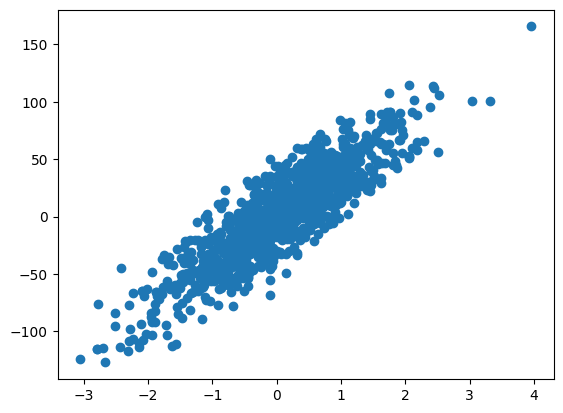

In [29]:
plt.scatter(x, y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print('lr.coef_(m): ',lr.coef_)
print('lr.intercept_(b): ',lr.intercept_)

lr.coef_(m):  [38.04690796]
lr.intercept_(b):  1.2690802933530623


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7640799209419177

In [7]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, x, y, scoring='r2', cv=10))

np.float64(0.8821727978500112)

### Class

In [38]:
class MyGDRegressor:
    def __init__(self, m, b, l_rate, epochs):
        self.intercept_ = b
        self.coeff_ = m
        self.learning_rate = l_rate
        self.epochs = epochs
        
    def fit(self, x_train, y_train):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y_train-self.coeff_*x_train.ravel()-self.intercept_)

            loss_slope_m = -2*np.sum((y_train-self.coeff_*x_train.ravel()-self.intercept_)*x_train.ravel())

            self.intercept_ = self.intercept_ - (loss_slope_b*self.learning_rate)

            self.coeff_ = self.coeff_ - (loss_slope_m*self.learning_rate)
        print(self.intercept_)
        print(self.coeff_)
        pass
    
    
    def predict(self, x_test):
        return self.coeff_*x_test + self.intercept_
    
    def visualize_gd_graph(self):
        pass

In [39]:
gd = MyGDRegressor(100, 100, l_rate=0.001, epochs=50)
gd.fit(x_train,y_train)
gd_predict = gd.predict(x_test)

1.269080381732053
38.046908034093526


In [40]:
r2_score(y_test, gd_predict)

0.7640799206737132